In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *
from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, WindowAverage, SeasonalNaive

In [3]:
df = pd.read_csv(r"C:\Users\Nav\Documents\BaggageRevenueModel\BaggageRevenueModel\data\combined_bag_revenue.csv")
df.head()

,Airline,2015-Q1,2015-Q2,2015-Q3,2015-Q4,2016-Q1,2016-Q2,2016-Q3,2016-Q4,2017-Q1,...,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3,2024-Q4
0,Alaska,23686.0,30215.0,34127.0,24787.0,30484.0,35022.0,39297.0,30811.0,30602.0,...,92981.0,80917.0,74482.0,97943.0,101337.0,84549.0,83934.0,106033.0,118372.0,98236.0
1,Allegiant,40444.0,42463.0,39934.0,38523.0,43759.0,45934.0,45168.0,42468.0,46556.0,...,83634.0,80586.0,88685.0,96696.0,86787.0,85386.0,90754.0,101292.0,90031.0,89385.0
2,American,151758.0,165660.0,292089.0,267293.0,262464.0,288836.0,288124.0,278048.0,272805.0,...,351356.0,348944.0,325296.0,352279.0,342047.0,337299.0,334743.0,394435.0,389782.0,382369.0
3,Delta,198119.0,226294.0,236890.0,213799.0,197690.0,232461.0,228971.0,213297.0,203507.0,...,252159.0,234831.0,226255.0,253222.0,259462.0,246286.0,239012.0,289749.0,259227.0,272113.0
4,Frontier,42011.0,49565.0,56582.0,71886.0,70755.0,71578.0,84962.0,79497.0,80224.0,...,201770.0,222968.0,221438.0,231463.0,211176.0,215842.0,203624.0,233695.0,212662.0,211643.0


In [13]:
# Reshape data for statsforecast

df_long = df.melt(id_vars=['Airline'], var_name='Quarter', value_name="Baggage Revenue")
df_long['Quarter'] = pd.PeriodIndex(df_long['Quarter'], freq='Q').to_timestamp(how="end")
df_long = df_long.rename(columns={"Airline": "unique_id", "Baggage Revenue": "y"})

# Final columns should be ['unique_id', 'ds', 'y']
df_long = df_long[['unique_id', 'Quarter', 'y']].rename(columns={"Quarter": "ds"})
df_long

,unique_id,ds,y
0,Alaska,2015-03-31 23:59:59.999999999,23686.0
1,Allegiant,2015-03-31 23:59:59.999999999,40444.0
2,American,2015-03-31 23:59:59.999999999,151758.0
3,Delta,2015-03-31 23:59:59.999999999,198119.0
4,Frontier,2015-03-31 23:59:59.999999999,42011.0
...,...,...,...
435,JetBlue,2024-12-31 23:59:59.999999999,143084.0
436,Southwest,2024-12-31 23:59:59.999999999,20956.0
437,Spirit,2024-12-31 23:59:59.999999999,123925.0
438,Sun Country,2024-12-31 23:59:59.999999999,25469.0


c:\Users\Nav\miniconda3\envs\bag_env\lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\Nav\miniconda3\envs\bag_env\lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


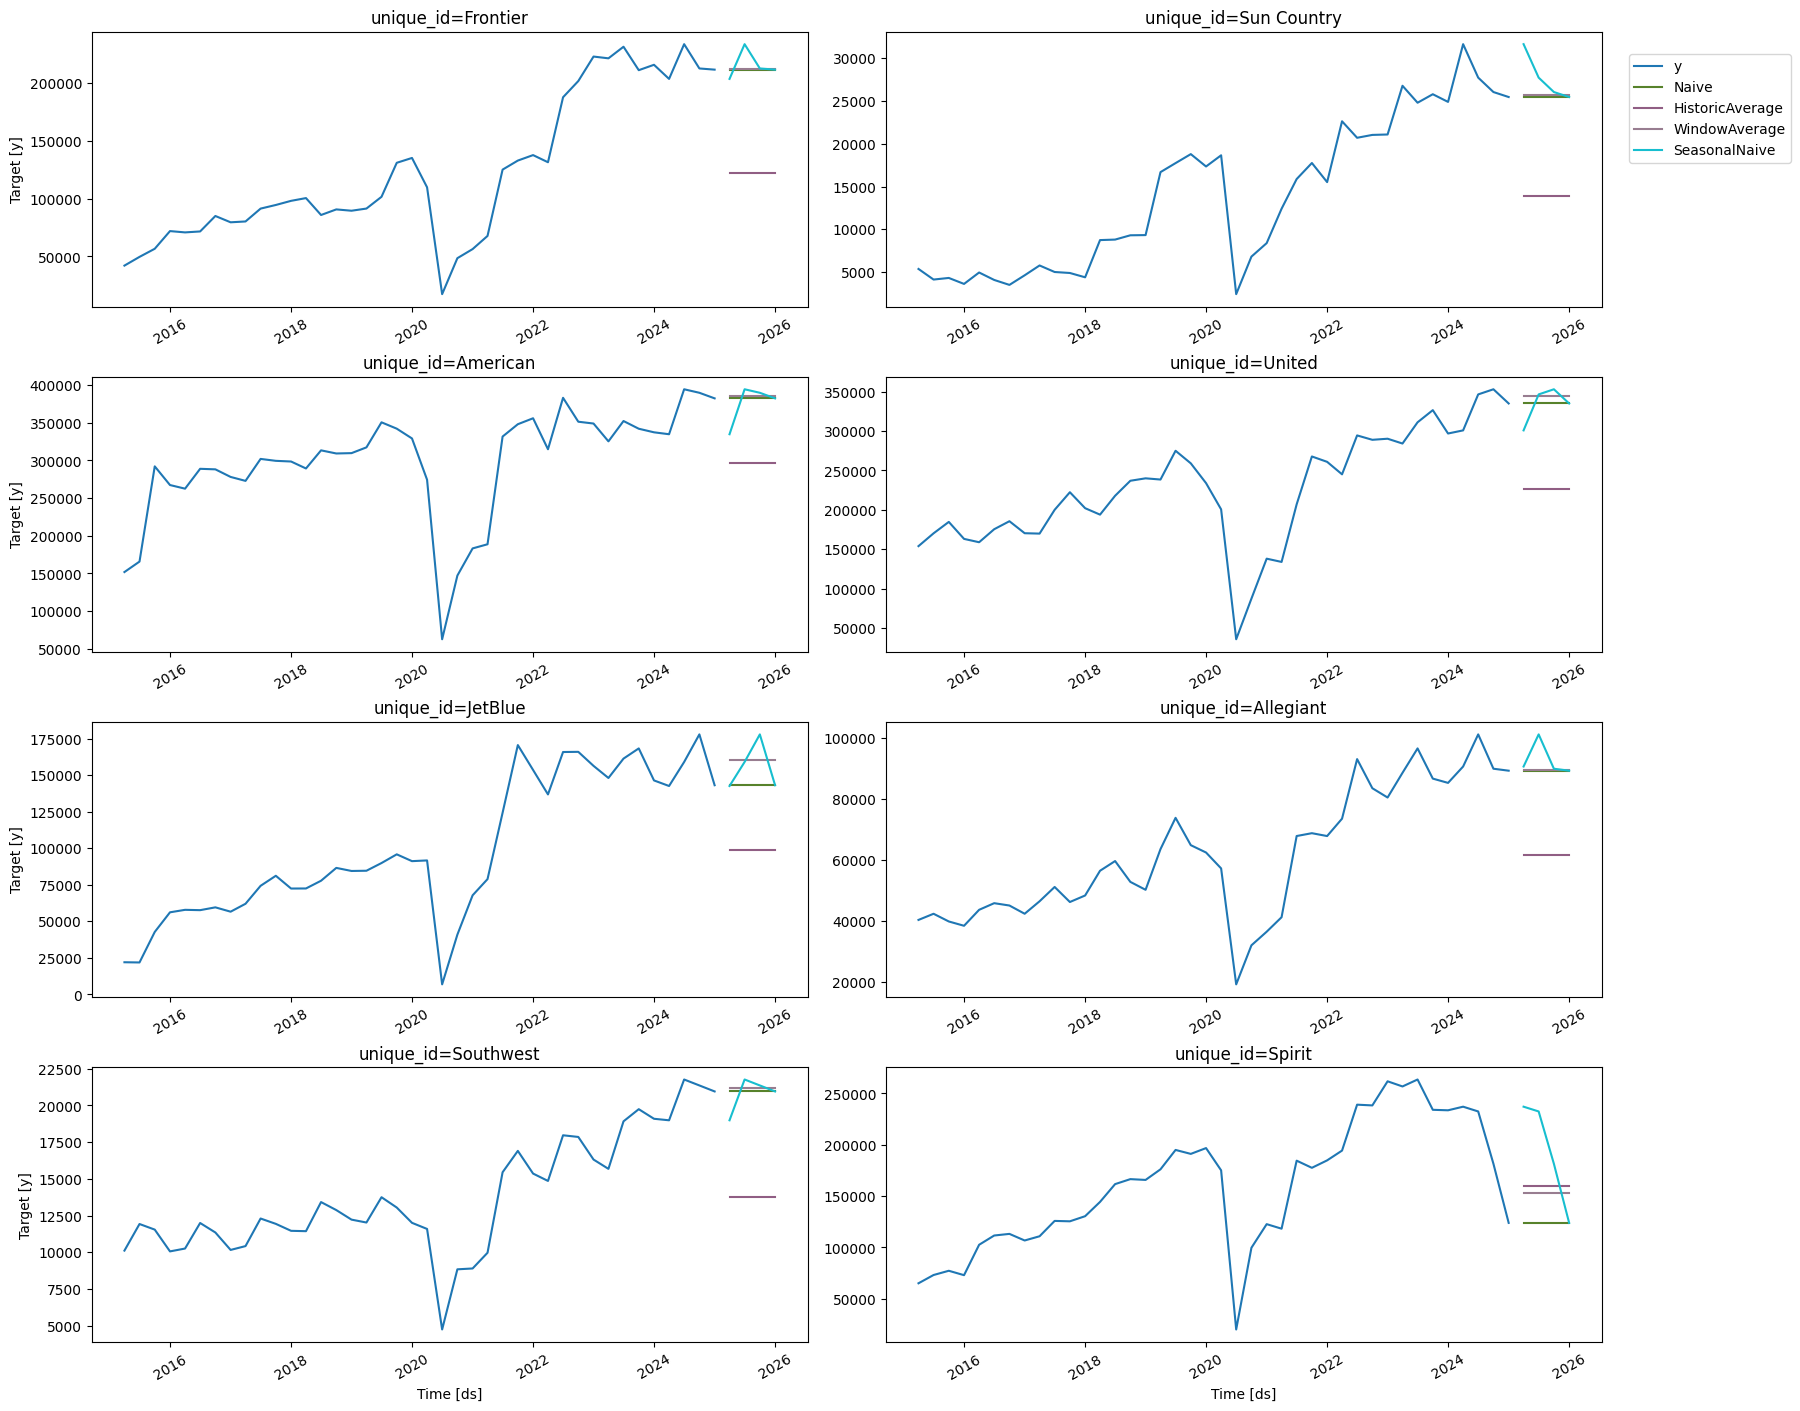

In [ ]:
# Baseline models
horizon = 4 # forecasting a year ahead

models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=2),
    SeasonalNaive(season_length=4)
]

sf = StatsForecast(models=models, freq='Q')
sf.fit(df=df_long)
preds = sf.predict(h=horizon)
preds.head()
plot_series(df=df_long, forecasts_df=preds)

In [ ]:
# Evaluation of Baseline Models
